In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
  import tensorflow as tf
  tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from pathlib import Path
import pandas as pd
# obtenemos la dirección de la tabla como path
labels_path = Path('/content/drive/My Drive/Colab Notebooks/10-monkey-species/monkey_labels.txt')
#inicialización del array donde guardaremos la información
labels_info = []

lines = labels_path.read_text().strip().splitlines()[1:]
#guardamos la información relevante de cada una de las clases
for line in lines:
    line = line.split(',') #separa por comas
    line = [x.strip(' \n\t\r') for x in line] #guardamos una copia de cada palabra teniendo en cuenta que una palabra esta separada de otra por salto de linea o tabulaciones
    line[3], line[4] = int(line[3]), int(line[4]) 
    line = tuple(line)
    labels_info.append(line)
    
#creamos un recuadro o una tabla con la información dada de cada linea y la separamos con columnas con lo que son 
labels_info = pd.DataFrame(labels_info, columns=['Label', 'Latin Name', 'Common Name', 
                                                 'Train Images', 'Validation Images'], index=None)
#muesta la s 10 primeras lineas
labels_info.head(10)

Label             Latin Name  ... Train Images  Validation Images
0    n0      alouatta_palliata  ...          131                 26
1    n1     erythrocebus_patas  ...          139                 28
2    n2         cacajao_calvus  ...          137                 27
3    n3         macaca_fuscata  ...          152                 30
4    n4        cebuella_pygmea  ...          131                 26
5    n5        cebus_capucinus  ...          141                 28
6    n6        mico_argentatus  ...          132                 26
7    n7       saimiri_sciureus  ...          142                 28
8    n8        aotus_nigriceps  ...          133                 27
9    n9  trachypithecus_johnii  ...          132                 26

[10 rows x 5 columns]

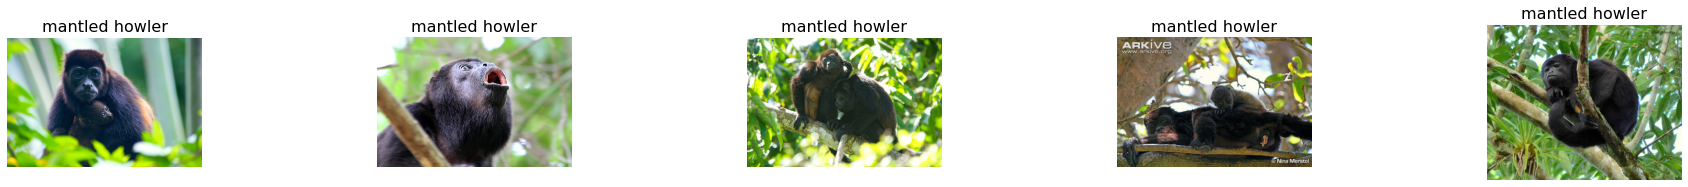

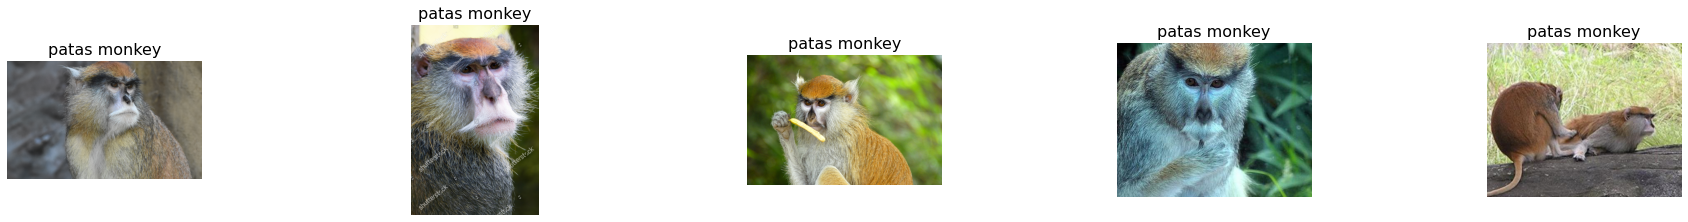

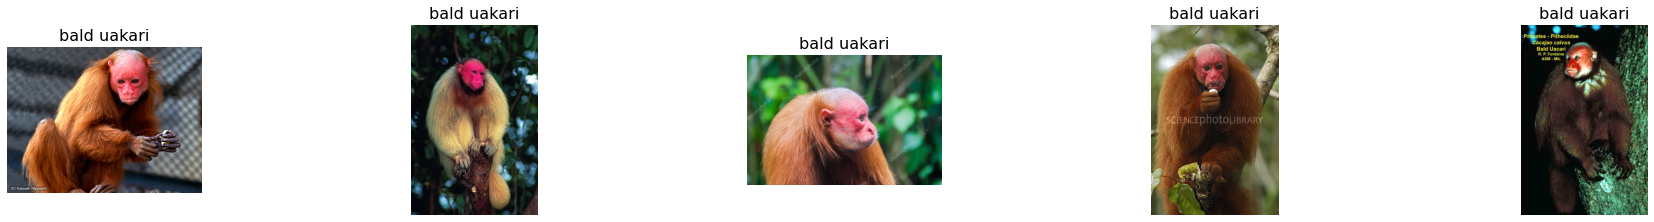

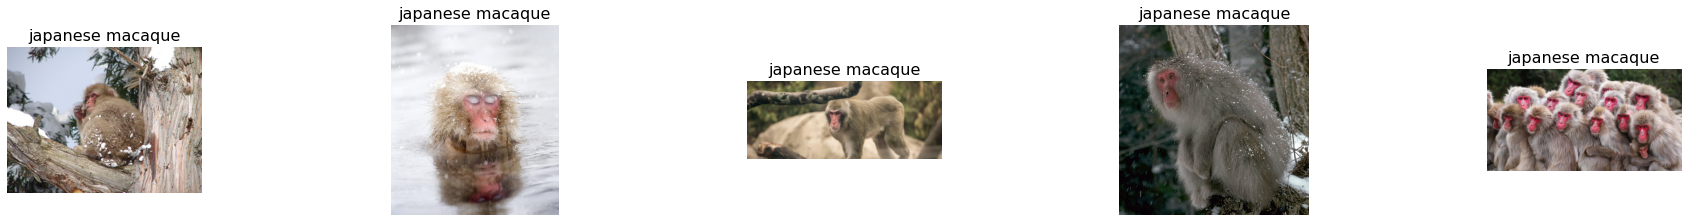

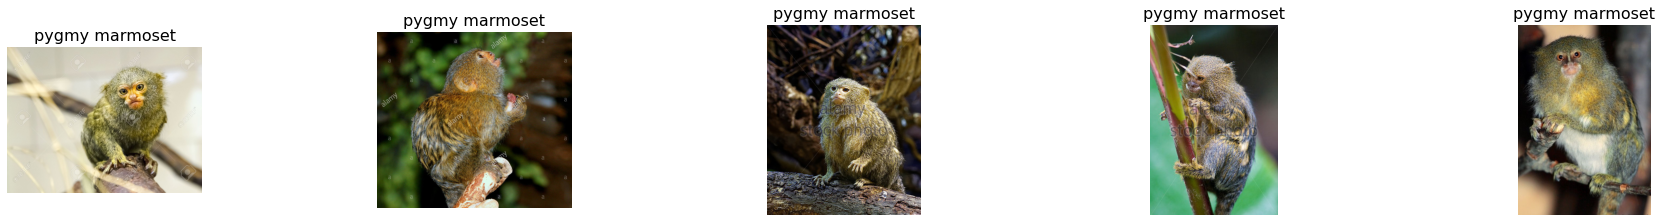

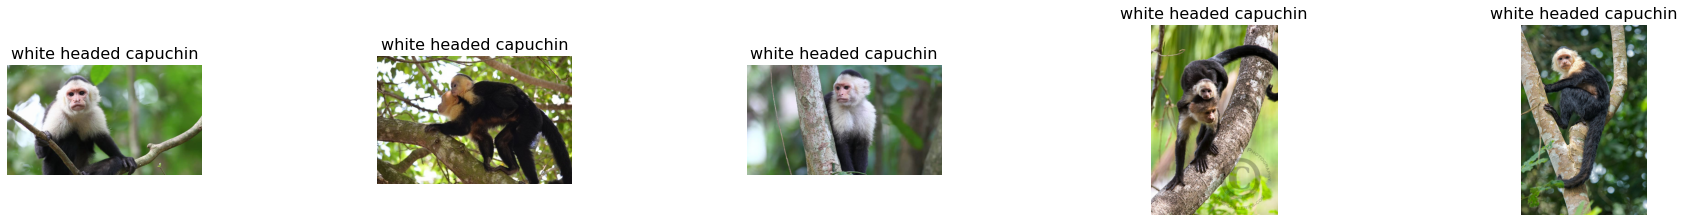

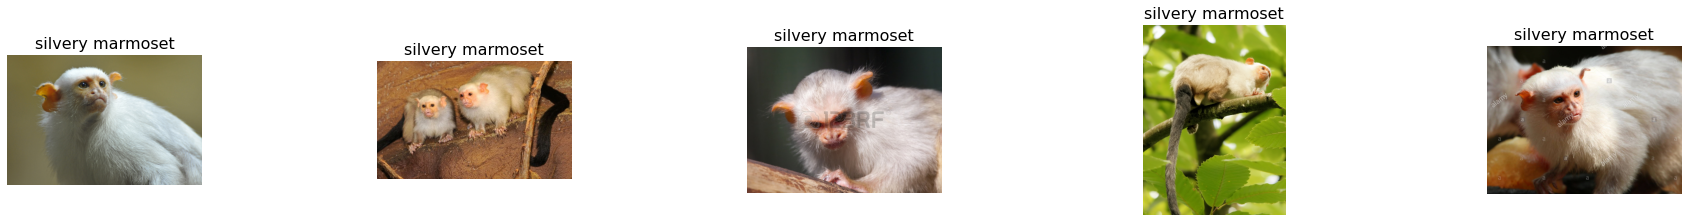

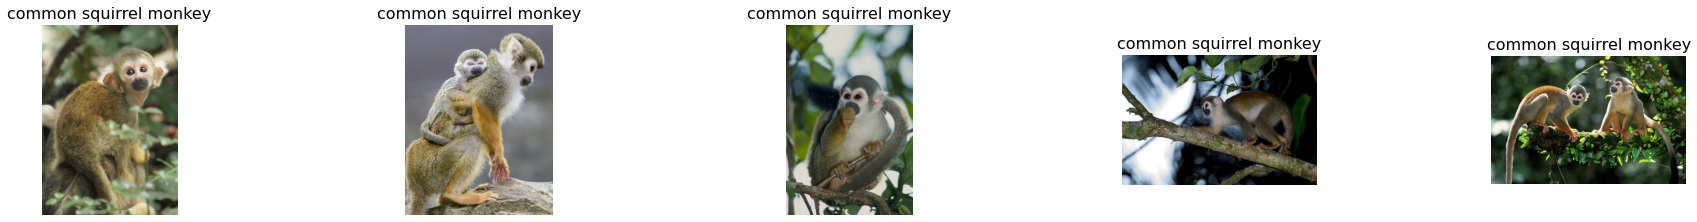

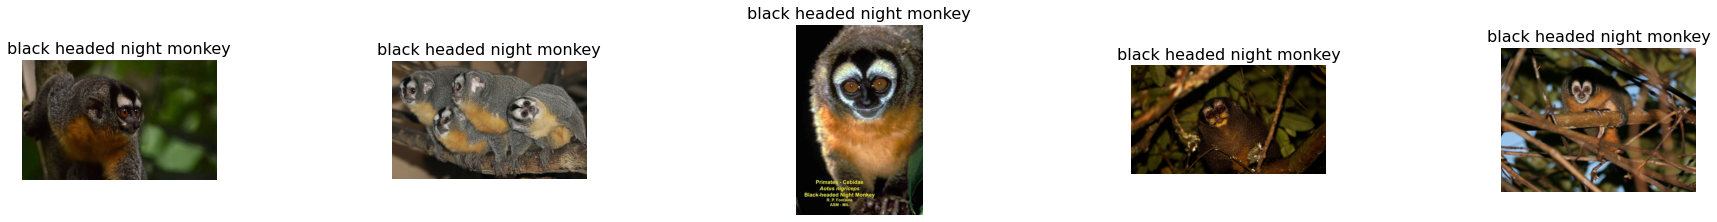

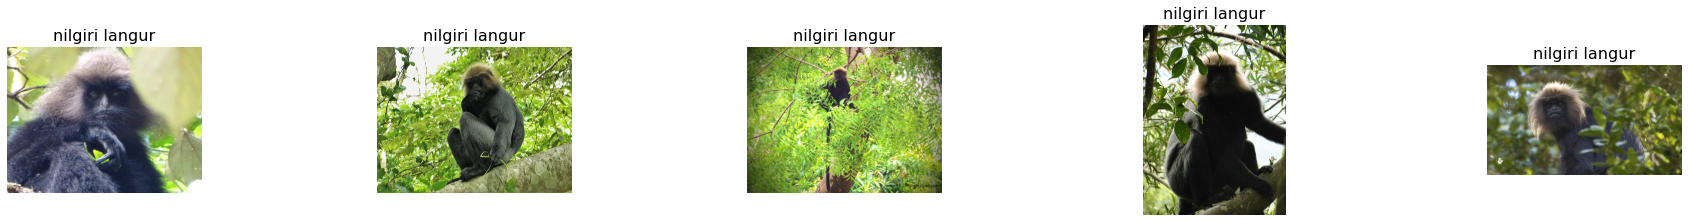

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

training_data = '/content/drive/My Drive/Colab Notebooks/10-monkey-species/training' 
validation_data = '/content/drive/My Drive/Colab Notebooks/10-monkey-species/validation' 

#creamos un dicionario con los nombres comunes de cada especie separadas por su numero de clase
labels_dict= {'n0':0, 'n1':1, 'n2':2, 'n3':3, 'n4':4, 'n5':5, 'n6':6, 'n7':7, 'n8':8, 'n9':9}
names_dict = dict(zip(labels_dict.values(), labels_info["Common Name"]))

#metodo que muestra 5 imagenes (30x30) de cada especie de mono sacadas del la cola de las imagenes de validacion
#separadas por filas y con sus respectivos nombres de comunes como titulos
def plot_image():
    columns = 5
    for classes in range(10):
        fig = plt.figure(figsize=(30,30)) 
        files = os.listdir(f'{validation_data}/n{classes}')[:columns]
        fig.subplots_adjust(hspace=0.9, wspace=0.9)
        for i in range(1, columns+1):
            img = plt.imread(f'{validation_data}/n{classes}/{files[i-1]}')
            pl = fig.add_subplot(columns,columns,i)
            pl.imshow(img)
            pl.axis("off")
            pl.set_title(names_dict[classes].replace("_", " "), fontsize=16)
plot_image()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from scipy import misc, ndimage
import numpy as np

#Variables de uso hiperparametros
height = width = 224                                                            #tamaño que se le dara a las imagenes 224x224
channels = 3                                                                    #número de canales RGB 3 filtros
classes = 10                                                                    #número de clases son 10 especies de monos
batch_size = 10                                                                 #lotes de 10 para entrenar y validar
epochs = 100                                                                    #epocas o cantidad máxima de veces que se realizara el entrenamiento
seed=42                                                                         #valor que sirve para randomizar el shuffle

# Data Augmentation
# valores de modificación que se le daran a las imagenes usadas durante el entrenamiento

train_datagen = ImageDataGenerator(
        rescale=1./255,             #rescalado (las imagenes RGB están compuestas por cuadriculas de valores entre 0 y 255) a valores entre 0 y 1 (monocromatic values) 
        width_shift_range=0.1,                                                  #desplazamiento de 0.1 de la imagen a lo ancho
        height_shift_range=0.1,                                                 #desplazamiento de 0.1 de la imagen a lo largo
        rotation_range=15,                                                      #rotación de 15 grados a las imagenes
        zoom_range = 0.2,                                                       #zoom de 0.2 a las imagenes
)

validation_datagen = ImageDataGenerator(
        rescale=1./255          
)
#generador de dataset de entrenamiento
train_generator = train_datagen.flow_from_directory(  
        training_data,                                                          #ruta del fichero donde se obtendra
        target_size=(height, width),                                            #tamaño de las imagenes
        batch_size=batch_size,                                                  #tamaño de los lotes
        seed=seed,                                                              #número aleatorio para aumentar la aleatoriedad del shuffle
        shuffle=True,                                                           #orden aleatiorio de las imagenes
        class_mode='categorical')                                               #modo de clase categorical ya que tenemos más de dos clases

validation_generator = validation_datagen.flow_from_directory(
        validation_data,
        target_size=(height, width),
        batch_size=batch_size,
        seed=seed,
        shuffle=False,
        class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


Found 1098 images belonging to 10 classes.


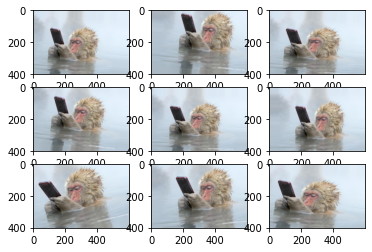

In [ ]:
# Ejemplo para observar el data augmentacion en una imagen en concreta aunque usaremos el anterior
import matplotlib.pyplot as plt
# es lo mismo que lo de arriba pero sin el rescale ya que no deja ver está prueba. 
#simplemente está prueba es para ver como funciona el data augmentation en una imagen
train_datagen_image = ImageDataGenerator(             
        width_shift_range=0.1,      
        height_shift_range=0.1,     
        rotation_range=15,          
        zoom_range = 0.2,
)
train_generator_image = train_datagen.flow_from_directory(
        training_data,
        target_size=(height, width),
        batch_size=batch_size, 
        seed=seed,
        shuffle=True,
        class_mode='categorical')


img = load_img('/content/drive/My Drive/Colab Notebooks/10-monkey-species/training/n3/n3021.jpg') #cargamos la imagen
data = img_to_array(img)                                                        #pasamos los datos a un array
samples = expand_dims(data, 0)                                                  #expandimos las dimensiones generando un array de los datos
it = train_datagen_image.flow(samples, batch_size=batch_size)                   #inicializamos el iterador para obtener los valores de la imagen

for i in range(9):
	plt.subplot(331  + i)                                                         #creamos subplots
	batch = it.next()                                                             #generamos un lote que contendra el contenido del iterador
	image = batch[0].astype('uint8')                                              #convertimos los valores a intergers de valor positivo
	plt.imshow(image)                                                             #trasamos los datos de los pixeles sin procesar
plt.show()                                                                      #mostramos el plot

In [ ]:
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, Dense, Dropout, Flatten, AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D,Input, BatchNormalization
import keras

#Creamos un modelo de red neuronal (al no especificarse nunca el stride o los movimientos de los kernels seran de 1x1), con el metodo Sequential
#La forma de la red neuronal sera una simple combinación de Conv2D seguidas de MaxPooling2D y finalizando en una combinación de Dropout, Flaten, Dense, Dropout, Dense

#Capas definiciones:
#1)  Conv2D: añadimos una capa de entrada con una red convolucional con un filtro de salida de 64 (en el primer caso en el resto ira aumentando) o capa oculta de 64, 
#    que acepta entradas de 224x224x3 (solo la primera hace falta definirla ya que es la entrada "input_shape"), ademas de activar la función rectificadora relu
#    el kernel sera de 3x3 (es decir el array que ira reccoriendo la imagen y tomando los valores sera 3x3)

#2) MaxPooling2D: capa que sirve para tomar las "caracteristicas" o el valor más alto de una agrupación de 2x2 o del tamaño de la pool_size

#3) Dropout: por lo general toma como valor 0.5 esta capa desactiva neuronas aleatorias con la finalidad de mejorar el resto de neuronas

#4) Flatten: más conocido como perceptron esta es la capa encargada de resolver el "problema" o de encontrar las similitudes

#5) Dense: capa densa que sirve para sacar las salidas de las redes, esta toma los pesos del perceptron y de la capa anterior para determinar si la imagen es de una clase u otra.

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


#compilación del modelo con la función loss categorical_crossentropy, optimizador Adadelta y metricas de precision

#Categorical_Crossentropy: La perdida de entropia cruzada o perdida de registro crossentropy, mide el rendimiento de un modelo de clasificación en el que se estan midiendo
#dos distribuciones de probabilidades, en nuestro caso las precisiones del entrenamiento y la validación, esta aumenta a medida que la probabilidad pronostica difiere de la 
#etiqueta real, por ejemplo si el valor se esta aproximando a 0 y la etiqueta real es 1 sería malo y daía como resultado un alto valor de loss o perdida. En el caso de que
#la probabilidad pronostica se acerca a la etiqueta real este valor de perdida disminuye. Añadir que en nuestro caso es Categorical debido a que tenemos más de 2 clases

#Adadelta es un optimizador de la clase keras de tipo stochastic gradient descent que se basa en el aprendizaje adaptativo por dimensiones

#metric accuracy es lo que hace que aparezca los valores al ejecutar

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.summary()                                                                 #Muestra el resumen del modelo de la red
model.save("monkey_model.h1")                                                   #guarda el model en monkey_model.h1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 512)      

In [ ]:
from keras.callbacks import EarlyStopping

# creamos una variable tipo EarlyStopping que monitorizara el val_accuracy, tomando el valor maximo como referencia
# ademas permite hasta 10 valores por debajo del valor máximo (patience) y al finalizar restaura los mejores valores.
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=classes, restore_best_weights=True)

# Entrenamiento del modelo
history = model.fit_generator(
        train_generator,                                                        #pool de imagenes con las que se entrenara
        epochs=epochs,                                                          #cantidad de epocas o repeticiones
        validation_data = validation_generator,                                 #pool de imagenes de validación
        callbacks = [es]                                                        #monitor de finalización con el early stop
)

model.save("entreno-Monos.h1")                                                  #guardado del modelo

Epoch 1/100
110/110 [==============================] - 49s 443ms/step - loss: 2.3724 - accuracy: 0.1330 - val_loss: 2.5830 - val_accuracy: 0.2096
Epoch 2/100
110/110 [==============================] - 44s 400ms/step - loss: 2.1803 - accuracy: 0.2368 - val_loss: 1.4675 - val_accuracy: 0.3860
Epoch 3/100
110/110 [==============================] - 45s 411ms/step - loss: 1.7516 - accuracy: 0.3989 - val_loss: 1.8744 - val_accuracy: 0.4449
Epoch 4/100
110/110 [==============================] - 45s 408ms/step - loss: 1.5252 - accuracy: 0.4754 - val_loss: 1.3244 - val_accuracy: 0.4118
Epoch 5/100
110/110 [==============================] - 45s 409ms/step - loss: 1.4548 - accuracy: 0.4927 - val_loss: 1.5001 - val_accuracy: 0.4779
Epoch 6/100
110/110 [==============================] - 45s 406ms/step - loss: 1.3282 - accuracy: 0.5219 - val_loss: 0.5936 - val_accuracy: 0.4669
Epoch 7/100
110/110 [==============================] - 45s 411ms/step - loss: 1.2419 - accuracy: 0.5546 - val_loss: 0.9404 -

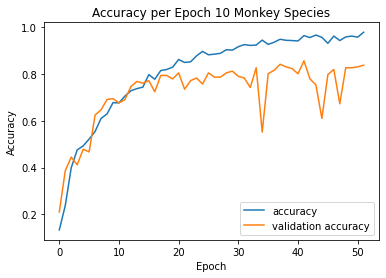

In [ ]:
# ACCURACY --------------------------------------

import matplotlib.pyplot as plt
#grafica que muestra la precisión tanto del entrenamiento como de la validación
plt.plot(history.history['accuracy'], label='accuracy')                         #toma los valores de accuracy
plt.plot(history.history['val_accuracy'], label='validation accuracy')          #toma los valores del val_accuracy

plt.title('Accuracy per Epoch 10 Monkey Species')                               #titulo 
plt.xlabel('Epoch')                                                             #colocar etiqueta en el eje x para las epocas
plt.ylabel('Accuracy')                                                          #colocar etiqueta en el eje y para la presición
plt.legend(loc="lower right")                                                   #posición de la leyenda

plt.show()                                                                      #visualización de la grafica

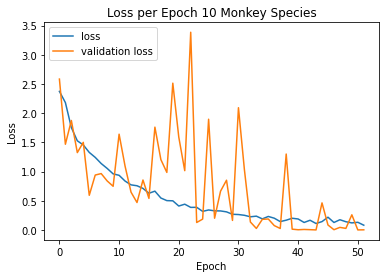

In [ ]:
# LOSS --------------------------------------

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Loss per Epoch 10 Monkey Species')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper left")

plt.show()

(224, 224, 3)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

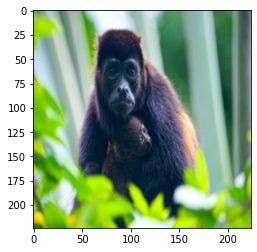

In [ ]:
# PREDICTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

model = keras.models.load_model("entreno-Monos.h1")

%matplotlib inline

  
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/10-monkey-species/validation/n0/n000.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 224x224x3

  # El método `predict` hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x224x224x3

im = im.reshape(1,224,224,3)
model.predict(im)


(224, 224, 3)


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

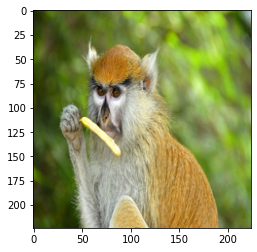

In [ ]:
model = keras.models.load_model("entreno-Monos.h1")

%matplotlib inline

  
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/10-monkey-species/validation/n1/n101.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 224x224x3

  # El método `predict` hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x224x224x3

im = im.reshape(1,224,224,3)
model.predict(im)

(224, 224, 3)


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

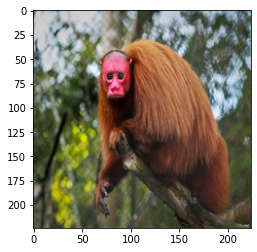

In [ ]:
model = keras.models.load_model("entreno-Monos.h1")

%matplotlib inline

  
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/10-monkey-species/validation/n2/n200.jpg', 'r')
im = np.asarray(pil_im.resize((224, 224)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 224x224x3

  # El método `predict` hace la predicción de un lote de entradas, no solo una. 
  # En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
  # al array numpy para que la entrada tenga la dimensión: 1x224x224x3

im = im.reshape(1,224,224,3)
model.predict(im)

 **Esquema de la Red Neuronal**
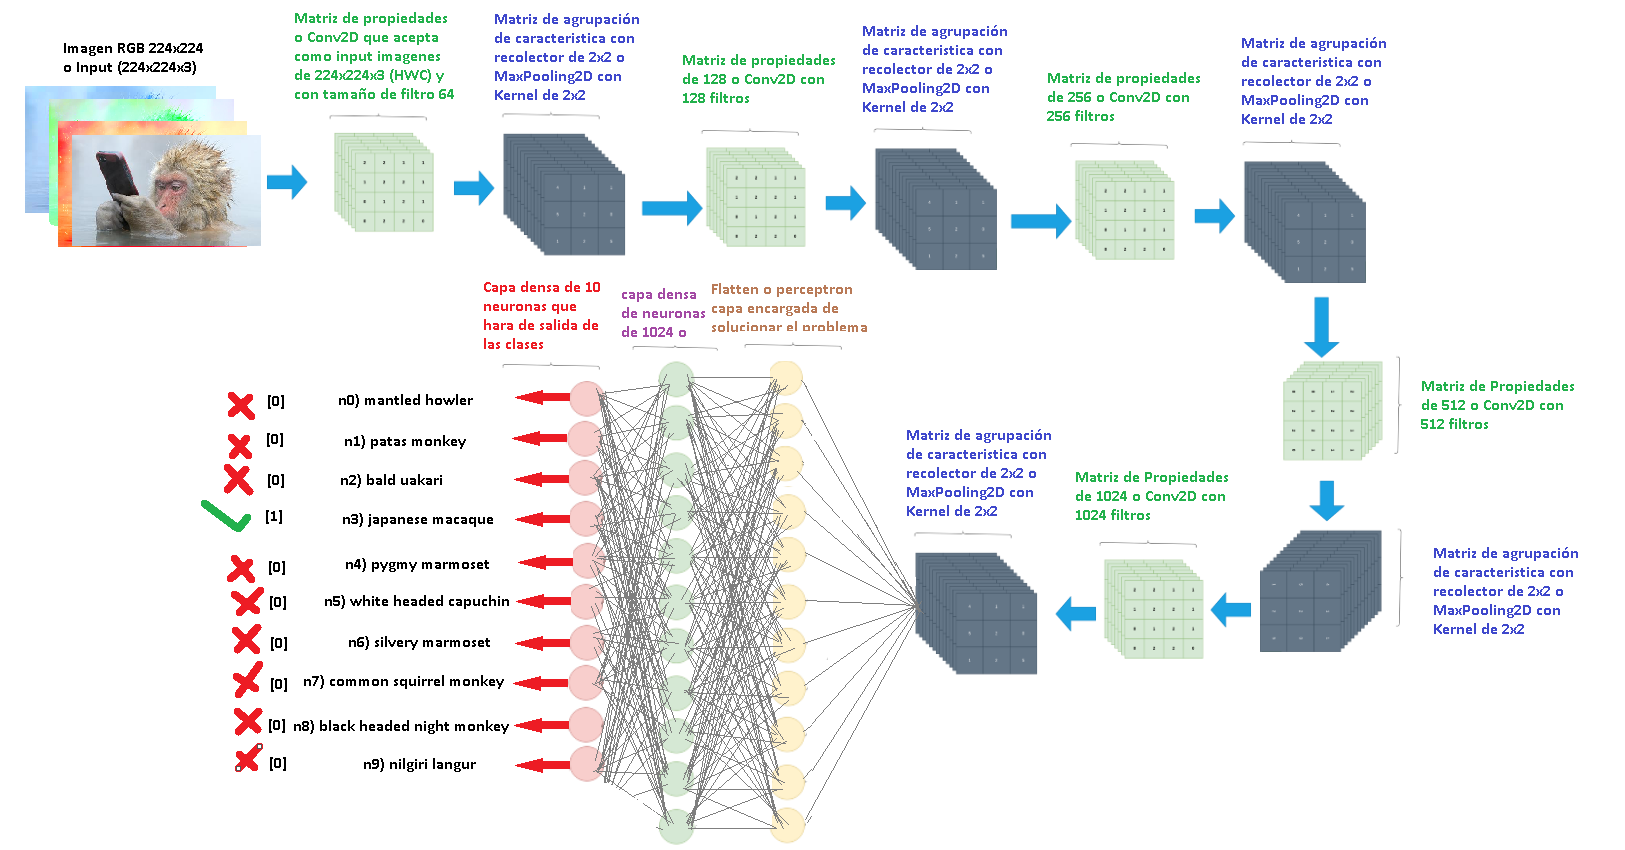
